## Code

### Array-based Priority Queue

In [1]:
# A simple implementation of Priority Queue
# using Queue.
class PriorityQueueArray(object):
    def __init__(self):
        self.queue = []

    def __str__(self):
        return ' '.join([str(i) for i in self.queue])

    # for checking if the queue is empty
    def isEmpty(self):
        return len(self.queue) == 0

    def length(self):
        return len(self.queue) 

    # for inserting an element in the queue
    def insert(self, data):
        self.queue.append(data)

    # for popping an element based on Priority
    def pop(self):
        try:
            min = -1
            for i in range(len(self.queue)):
                if self.queue[i][0] < self.queue[min][0]:
                    min = i
            item = self.queue[min]
            del self.queue[min]
            return item
        except IndexError:
            print()
            exit()
   
       
    def remove(self, x):
        for i in range(len(self.queue)):
                if self.queue[i][1] == x:
                    del self.queue[i]
                    break

### Function definitions

In [2]:
from random import randint
import numpy as np
import pandas as pd
import math
import networkx as nx
import matplotlib.pyplot as plt
import time
import heapq

# function that implements the Dijkstra's algorithm for single-pair shortest paths using adjacency matrix and array priority queue
def dijkstra_adj_matrix_array(g, source):
    d = [math.inf for i in range(len(g))]
    S = [0 for i in range(len(g))]
    pi = [-1 for x in range(len(g))]

    d[0] = 0

    pq = PriorityQueueArray()
    for v in range(len(g)):
        pq.insert([d[v], v])
    
    while not pq.isEmpty(): 
        u = pq.pop()
        
        S[u[1]] = 1

        # check all vertices adjacent to u
        for v in range(len(g[u[1],:])):
            if g[u[1]][v]!=0:
                if (S[v]!=1 and d[v]>d[u[1]]+g[u[1]][v]):
                    # search for and remove v from queue
                    for x in range(pq.length()):
                        if(pq.queue[x][1]==v):
                            pq.remove(x)
                            break
                    d[v] = d[u[1]]+g[u[1]][v] #update estimated distance
                    pi[v] = u[1] #update predecessor
                    pq.insert([d[v], v])
    return d


# function that implements the Dijkstra's algorithm for single-pair shortest paths using adjacency list and min heap priority queue
def dijkstra_adj_list_min_heap(g, source):        
                    
    # initialise S(pathed vertices), d(estimates of lengths), and pi(predecessors for each vertex)
    S = [0 for x in range(len(g))]
    d = [math.inf for x in range(len(g))]
    pi = [-1 for x in range(len(g))]
    d[source] = 0
    # initialise priority queue
    pq = [(d[v], v) for v in range(len(g))]
    
    # push all edges from node source to queue in format (weight, destination node)
    heapq.heapify(pq)
    while(pq):
        # get closest estimated node
        u = heapq.heappop(pq)
        S[u[1]] = 1
        # check all vertices adjacent to u
        for v in g[u[1]]:
            if(S[v[0]]!=1 and d[v[0]]>d[u[1]]+v[1]):
                # search for and remove v from queue
                for x in range(len(pq)):
                    if(pq[x][1]==v):
                        pq.pop(x)
                d[v[0]] = d[u[1]]+v[1] #update estimated distance
                pi[v[0]] = u[1] #update predecessor
                heapq.heappush(pq, (d[v[0]], v[0])) # push updated v into queue
    return d

    
# function that creates the graphs g1 and g2, where g1 is the adjacency matrix representation and g2 is the adjacency list representation
def make_graph(NUMBER_NODES, NUMBER_EDGES):
    if NUMBER_NODES*NUMBER_NODES<NUMBER_EDGES: 
        print("Impossible to generate a simple graph with %i nodes and %i edges!\n" %(NUMBER_NODES,NUMBER_EDGES))
        return None

    # create g2, the adjacency list representation
    g2 = [[] for i in range(NUMBER_NODES)]
    for i in range(NUMBER_EDGES):
        while True:
            start_node = randint(0,NUMBER_NODES-1)
            end_node = randint(0,NUMBER_NODES-1)
            weight = randint(1,20)
            if (start_node != end_node): 
                found = False
                for j in range(len(g2[start_node])): 
                    if g2[start_node][j][0] == end_node: found = True
                if not found: break            
        g2[start_node].append([end_node, weight])
        g2[end_node].append([start_node, weight])

    # create g1, the adjacency matrix representation from g2
    g1 = np.array([[0 for i in range(NUMBER_NODES)] for i in range(NUMBER_NODES)])
    for i in range(len(g2)):
        for j in range(len(g2[i])):
            node = g2[i][j][0]
            weight = g2[i][j][1]
            g1[i][node] = weight  
    return g1, g2
 

# function that prints the graph and plots it
def print_graph(g1, g2):
    print("Adjacency Matrix:")
    print(g1)
    
    print("Adjacency List:")
    for i in range(len(g2)):
        print("from node %02i: " %(i),end="")
        print(g2[i])

    # plot the graph visually
    G = nx.Graph()
    for i in range(len(g2)): G.add_node(i)
    for i in range(len(g2)):
        for j in range(len(g2[i])): G.add_edge(i,g2[i][j][0],weight=g2[i][j][1])
    try: 
        pos = nx.planar_layout(G)
        nx.draw(G,pos, with_labels=True)
    except nx.NetworkXException:
        print("\nGraph is not planar, using alternative representation")
        pos = nx.spring_layout(G)
        nx.draw(G,pos, with_labels=True)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

## Testing the algorithms



 ******** GENERATING GRAPH ********
Adjacency Matrix:
[[ 0  0 18  0  0  0  9  1]
 [ 0  0  0 16  0 11 11 14]
 [18  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  9  4  8]
 [ 0  0  0  0  0 13  0  0]
 [ 0 11  0  9 13  0  0  0]
 [ 9 11  0  4  0  0  0 16]
 [ 1 14  0  8  0  0 16  0]]
Adjacency List:
from node 00: [[7, 1], [2, 18], [6, 9]]
from node 01: [[5, 11], [7, 14], [6, 11], [3, 16]]
from node 02: [[0, 18]]
from node 03: [[6, 4], [7, 8], [5, 9], [1, 16]]
from node 04: [[5, 13]]
from node 05: [[1, 11], [3, 9], [4, 13]]
from node 06: [[3, 4], [7, 16], [0, 9], [1, 11]]
from node 07: [[0, 1], [3, 8], [6, 16], [1, 14]]


 ******** PERFORMING DIJKSTRA ********
Using Adjacency Matrix and Array Priority Queue: 
[0, 15, 18, 9, 31, 18, 9, 1]
Time taken:  0.0
Using Adjacency List and Min Heap Priority Queue: 
[0, 15, 18, 9, 31, 18, 9, 1]
Time taken:  0.0


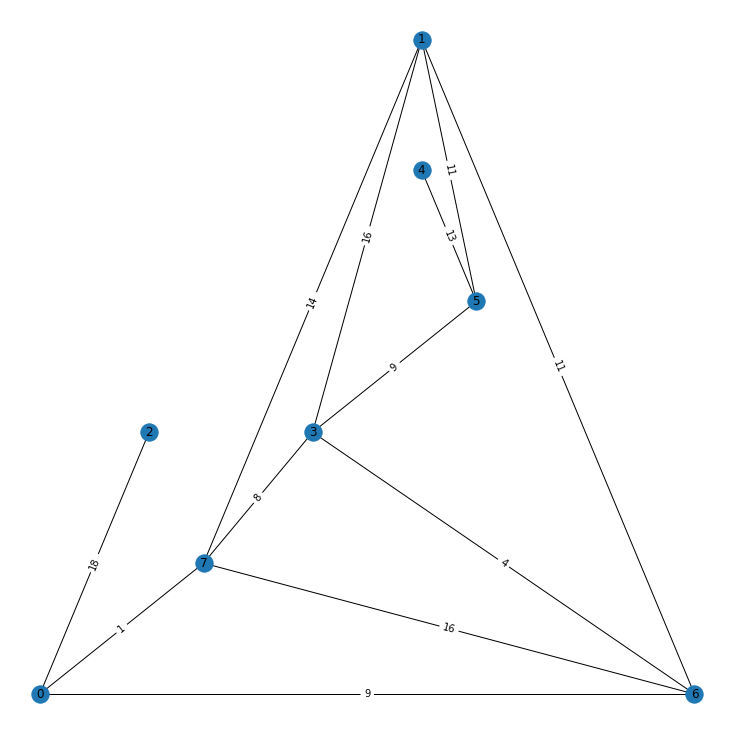

In [3]:
NODES = 8         # defines number of nodes in the graph
EDGES = 12         # defines number of edges in the graph

print("\n\n ******** GENERATING GRAPH ********" )     
g1, g2 = make_graph(NODES,EDGES)
if g2==None: raise SystemExit(0)
elif NODES<50 and EDGES<2500:
    plt.figure(1,figsize=(10,10))
    print_graph(g1, g2)

print("\n\n ******** PERFORMING DIJKSTRA ********" )  
start_time1 = time.time()  
d1 = dijkstra_adj_matrix_array(g1, 0)
end_time1 = time.time()

print("Using Adjacency Matrix and Array Priority Queue: ")
print(d1)
print("Time taken: ", format(end_time1-start_time1))

start_time2 = time.time()  
d2 = dijkstra_adj_list_min_heap(g2, 0)
end_time2 = time.time()

print("Using Adjacency List and Min Heap Priority Queue: ")
print(d2)
print("Time taken: ", format(end_time2-start_time2))

## Checking the performance

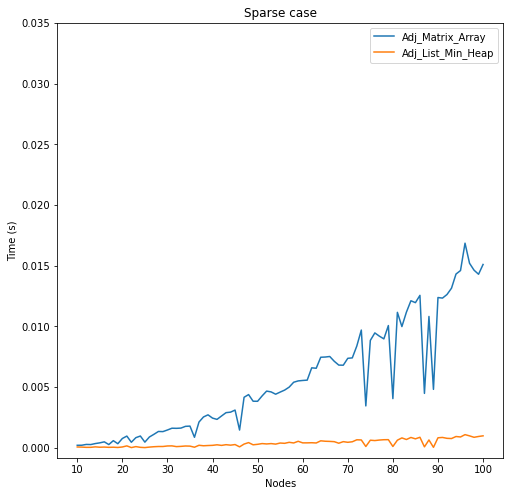

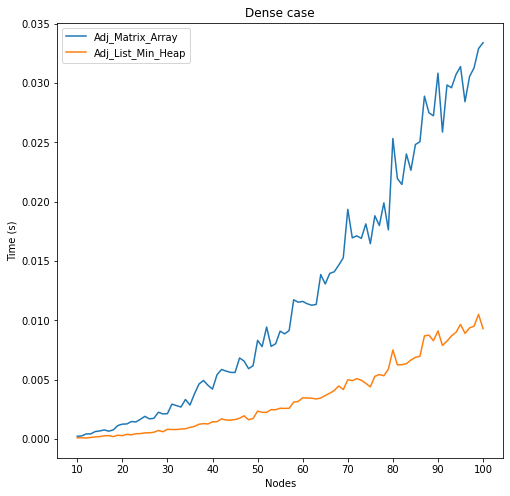

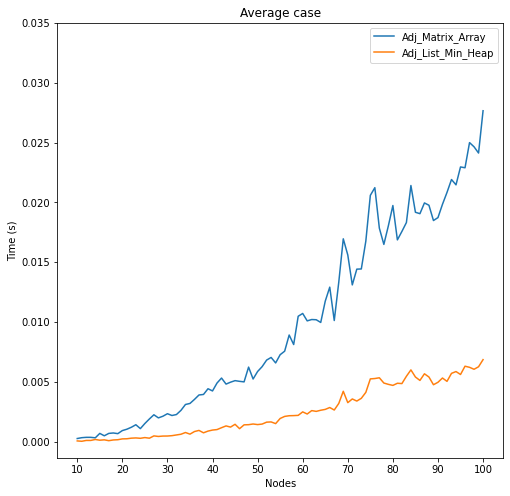

In [4]:
#Sparse case
df1 = pd.DataFrame(columns=["Nodes", "Adj_Matrix_Array", "Adj_List_Min_Heap"])
for nodes in range(10, 101, 1):
    g1_times = []
    g2_times = [] 
    
    # generate graphs
    g1, g2 = make_graph(nodes, nodes)

    for _ in range(100):
        start_time1 = time.time() 
        d1 = dijkstra_adj_matrix_array(g1, 0)
        end_time1 = time.time() 
        g1_times.append(end_time1-start_time1)

        start_time2 = time.time()  
        d2 = dijkstra_adj_list_min_heap(g2, 0)
        end_time2 = time.time() 
        g2_times.append(end_time2-start_time2)
    
    df1 = df1.append({"Nodes": nodes, "Adj_Matrix_Array": np.mean(g1_times), "Adj_List_Min_Heap": np.mean(g2_times)}, ignore_index = True)
    

#Dense case
df2 = pd.DataFrame(columns=["Nodes", "Adj_Matrix_Array", "Adj_List_Min_Heap"])
for nodes in range(10, 101, 1):
    g1_times = []
    g2_times = [] 
    
    # generate graphs
    g1, g2 = make_graph(nodes, int(nodes*(nodes-1)/2))

    for _ in range(100):
        start_time1 = time.time() 
        d1 = dijkstra_adj_matrix_array(g1, 0)
        end_time1 = time.time() 
        g1_times.append(end_time1-start_time1)

        start_time2 = time.time()  
        d2 = dijkstra_adj_list_min_heap(g2, 0)
        end_time2 = time.time() 
        g2_times.append(end_time2-start_time2)
    
    df2 = df2.concat({"Nodes": nodes, "Adj_Matrix_Array": np.mean(g1_times), "Adj_List_Min_Heap": np.mean(g2_times)}, ignore_index = True)

    
#Average case
df3 = pd.DataFrame(columns=["Nodes", "Adj_Matrix_Array", "Adj_List_Min_Heap"])
for nodes in range(10, 101, 1):
    g1_times = []
    g2_times = [] 
    
    # generate graphs
    g1, g2 = make_graph(nodes, int(nodes*(nodes-1)/4))

    for _ in range(100):
        start_time1 = time.time() 
        d1 = dijkstra_adj_matrix_array(g1, 0)
        end_time1 = time.time() 
        g1_times.append(end_time1-start_time1)

        start_time2 = time.time()  
        d2 = dijkstra_adj_list_min_heap(g2, 0)
        end_time2 = time.time() 
        g2_times.append(end_time2-start_time2)
    
    df3 = df3.append({"Nodes": nodes, "Adj_Matrix_Array": np.mean(g1_times), "Adj_List_Min_Heap": np.mean(g2_times)}, ignore_index = True)

plt.figure(figsize = (8,8))
plt.title("Sparse case")
plt.plot(df1.Nodes, df1.Adj_Matrix_Array, label="Adj_Matrix_Array")
plt.plot(df1.Nodes, df1.Adj_List_Min_Heap, label = "Adj_List_Min_Heap")
plt.xticks(np.arange(min(df1.Nodes), max(df1.Nodes)+1, 10))
plt.yticks(np.arange(0.000, 0.040, 0.005))
plt.xlabel("Nodes")
plt.ylabel("Time (s)")
plt.legend()
plt.show()

plt.figure(figsize = (8,8))
plt.title("Dense case")
plt.plot(df2.Nodes, df2.Adj_Matrix_Array, label="Adj_Matrix_Array")
plt.plot(df2.Nodes, df2.Adj_List_Min_Heap, label = "Adj_List_Min_Heap")
plt.xticks(np.arange(min(df2.Nodes), max(df2.Nodes)+1, 10))
plt.yticks(np.arange(0.000, 0.040, 0.005))
plt.xlabel("Nodes")
plt.ylabel("Time (s)")
plt.legend()
plt.show()

plt.figure(figsize = (8,8))
plt.title("Average case")
plt.plot(df3.Nodes, df3.Adj_Matrix_Array, label="Adj_Matrix_Array")
plt.plot(df3.Nodes, df3.Adj_List_Min_Heap, label = "Adj_List_Min_Heap")
plt.xticks(np.arange(min(df3.Nodes), max(df3.Nodes)+1, 10))
plt.yticks(np.arange(0.000, 0.040, 0.005))
plt.xlabel("Nodes")
plt.ylabel("Time (s)")
plt.legend()
plt.show()